Coefficients: 
 [-0.02695497  0.42777515  0.01208875  0.19133395  0.36366648 -0.02122508
 -0.01256586  0.68452971]
Mean squared error: 39.98
Coefficient of determination: 0.98


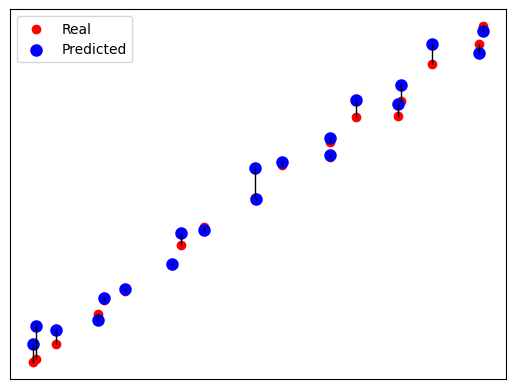

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
data = pd.read_csv('./initial_data.csv')
data_X = data.iloc[:, :8].to_numpy()
data_y = data['CO2'].to_numpy()

# Split the data into training/testing sets
data_X_train = data_X[:-20]
data_X_test = data_X[-20:]

# Split the targets into training/testing sets
data_y_train = data_y[:-20]
data_y_test = data_y[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(data_X_train, data_y_train)

# Make predictions using the testing set
data_y_pred = regr.predict(data_X_test)

# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(data_y_test, data_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(data_y_test, data_y_pred))

# Plot outputs
plt.scatter(data_X_test[:, 1], data_y_test, color="red")
plt.scatter(data_X_test[:, 1], data_y_pred, color="blue", linewidth=3)
# draw lines that connect the predicted points with the real points
for i in range(len(data_X_test)):
    plt.plot([data_X_test[i, 1], data_X_test[i, 1]], [data_y_test[i], data_y_pred[i]], color='black', linewidth=1)

plt.legend(['Real', 'Predicted'])
plt.xticks(())
plt.yticks(())

plt.show()
